This example uses TensorFlow to sample from a distribution of a mixture model of 10 2D Gaussians

A Gaussian distribution $N(\mu, \Sigma)$ can be sampled by $X = \mu + EZ$, where $Z\sim N(0, I)$ and $\Sigma=EE^T$. This is called **Cholesky decomposition** if $E$ is a triangular matrix. X can also be sampled by $X = \mu + U^T\Lambda^{\frac{1}{2}}Z$, where 
$Z\sim N(0, I)$, and $\Sigma=U^T\Lambda{U}$, which is the **eigen decomposition**. Note that decomposition is not unique.

Hence, each $N(\mu, \Sigma)$ can be regarded as an rotation of $N(\mu, I)$. Given a vector $[cos(\theta), sin(\theta)]$ and its anticlockwise rotation, assume rotation is $\varphi$ degree, we can define a linear transformation 
$$
Ax = y
$$
where $x=[cos(\theta), sin(\theta)]$ and $y=[cos(\theta+\varphi), sin(\theta+\varphi)]$

We get 
$$
A = yx^T(xx^T)^{-1}
$$
Thus $$\Sigma=AA^T$$

In [51]:
import tensorflow as tf
import tensorflow.contrib.distributions as ds
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [70]:
# Initialize a single 3-variate Gaussian.
mu = [0, 0.]
cov = [[1., 0.50],
       [0.50, 0.3]]
scale = tf.cholesky(cov)
mvn = ds.MultivariateNormalTriL(
    loc=mu,
    scale_tril=scale)

samples = mvn.sample(10000)
with tf.Session() as sess:
    samples_val = sess.run(samples)

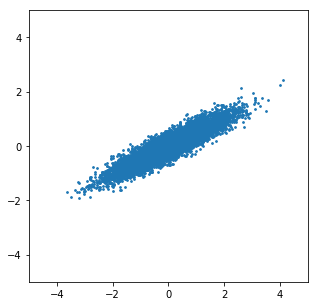

In [71]:
plt.figure(figsize=(5, 5))
plt.scatter(samples_val[:, 0], samples_val[:, 1], s=3.)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

[[ 0. -1.]
 [ 1.  0.]]


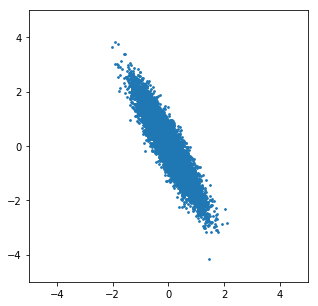

In [73]:
theta = tf.constant(0.0, dtype=tf.float32)
phi = tf.constant(2 * math.pi / 4, dtype=tf.float32)
x = [[tf.cos(theta)],[tf.sin(theta)]]
y = [[tf.cos(theta + phi)],[tf.sin(theta + phi)]]
#E = tf.matmul(tf.matmul(y, tf.transpose(x)), tf.matrix_inverse(tf.matmul(x, tf.transpose(x))))
#A = tf.convert_to_tensor([[tf.cos(theta + phi), -1],[tf.sin(theta + phi), 1]])
A = tf.convert_to_tensor([[0., -1],[1, 0]])
B = scale
E = tf.matmul(A, B)
cov = tf.matmul(E, tf.transpose(E))
scale_rotate = tf.cholesky(cov)

mvn = ds.MultivariateNormalTriL(
    loc=mu,
    scale_tril=scale_rotate)

samples = mvn.sample(10000)
with tf.Session() as sess:
    samples_val = sess.run(samples)
    print sess.run(A)
    
plt.figure(figsize=(5, 5))
plt.scatter(samples_val[:, 0], samples_val[:, 1], s=3.)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

In [9]:
import numpy as np
from numpy import linalg as LA

In [14]:
w, v = LA.eig(np.array([[1, 0.95], [0.95, 1]]))

In [15]:
w, v

(array([ 1.95,  0.05]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [71]:
a = np.asarray([[ 1.        ,  0.        ],
 [ 0.94999999,  0.31224993]])
b = np.transpose(a)

In [72]:
np.dot(a, b)

array([[ 1.        ,  0.94999999],
       [ 0.94999999,  1.        ]])

In [73]:
np.dot(np.dot(np.transpose(v), np.diag(w)), v)
np.dot(np.dot(v, np.diag(w)) ,np.transpose(v))

array([[ 1.  ,  0.95],
       [ 0.95,  1.  ]])

In [76]:
x = np.asarray([1, 0])

x_dash = np.dot(a, x)
x_dash2 = np.dot(np.dot(v, np.diag(np.sqrt(w))), x)

print x_dash, x_dash2

[ 1.          0.94999999] [ 0.98742088  0.98742088]
